# Census Income
This is a Sci-Kit Learn + Pandas example of classification problem. The dataset comes from http://archive.ics.uci.edu/. 

Data extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)). The data was also preprocessed for the purpose of this example.

Prediction task is to determine whether a person makes over 50K a year.


### List of attributes:

##### Features
- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, - 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



##### Labels
- income - >50K, <=50K. 

In [1]:
import pandas as pd
import numpy as np



### Load dataset

In [2]:
df = pd.read_csv("../data/census.csv")

print (df.shape)
print (df.columns)
df.head()

(32561, 12)
Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


## Task 1 - Initial analysis
Perform initial analysis to understand the data.

In [3]:
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [4]:
df.income.value_counts()


<=50K    24720
>50K      7841
Name: income, dtype: int64

In [5]:
for c in df.columns:
    print(f"{c}: {df[c].unique()}")

age: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relations

<AxesSubplot:>

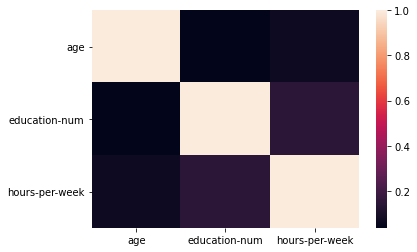

In [6]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)



## Task 2 - Preparing data
- Select features `X` and labels `y`. Make sure that your selection makes sense.
- Change the data into a numerical form to let your algorithm (logistic regression) deal with them
- Perform One-hot encoding if necessary
- Split your data into train and test subsets. Make sure that your split is reasonable. Use `stratify` if you consider it helpful.

In [7]:
X = df[['age', 'education', 'occupation', 'sex', 'hours-per-week', 'relationship', 'race']]
X

,age,education,occupation,sex,hours-per-week,relationship,race
0,39,Bachelors,Adm-clerical,Male,40,Not-in-family,White
1,50,Bachelors,Exec-managerial,Male,13,Husband,White
2,38,HS-grad,Handlers-cleaners,Male,40,Not-in-family,White
3,53,11th,Handlers-cleaners,Male,40,Husband,Black
4,28,Bachelors,Prof-specialty,Female,40,Wife,Black
...,...,...,...,...,...,...,...
32556,27,Assoc-acdm,Tech-support,Female,38,Wife,White
32557,40,HS-grad,Machine-op-inspct,Male,40,Husband,White
32558,58,HS-grad,Adm-clerical,Female,40,Unmarried,White
32559,22,HS-grad,Adm-clerical,Male,20,Own-child,White


In [8]:
y = df['income']
y.replace("<=50K", 0,inplace=True)
y.replace(">50K", 1,inplace=True)
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [9]:
X = pd.get_dummies(X,columns=['sex', 'education', 'race', 'relationship','occupation'])
X

,age,hours-per-week,sex_Female,sex_Male,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,39,40,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,13,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,40,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,53,40,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,28,40,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32557,40,40,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
32558,58,40,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32559,22,20,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=10)


In [11]:
from sklearn import preprocessing


In [12]:
# X_train_scaled = preprocessing.scale(X_train)
# X_test_scaled = preprocessing.scale(X_test)

## Task 4 - Logistic Regression
Train and test a logistic regression model. If you want to get a maximum score you must be sure that your model:
- Do not overfit
- Do not underfit
- Achieves at least 80% accuracy on the test subset.

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2500)

In [14]:
model.fit(X_train,y_train)


LogisticRegression(max_iter=2500)

In [15]:
print("Train model: ", model.score(X_train, y_train)*100)
print("Test model: ", model.score(X_test, y_test)*100)


Train model:  83.1914706914707
Test model:  83.41693110860886


## Task 5 - Precision and recall
- Compute precision and recall for your model, for both, train and test subsets.
- Make sure that you understand these metrics, you may be asked to explain the meaning of it.

In [16]:
from sklearn.metrics import recall_score, precision_score, classification_report

In [17]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [18]:
print(f"Recall score for training set equals: {recall_score(y_train,y_train_pred):.2f}")
print(f"Precision score for training set equals: {precision_score(y_train,y_train_pred):.2f}")
print("----------------------------------------------")
print(classification_report(y_train,y_train_pred))
tp = 0
fp = 0
fn = 0
# list_train_pred = list(y_train_pred.flatten())
# list_train = y_train.to_list()
# for ytp in zip(list_train_pred,list_train):
#     if ytp[0]==ytp[1] and ytp[1]==1:
#         tp+=1
#     if ytp[0]==1 and ytp[1] == 0:
#         fp+=1
#     if ytp[0]==0 and ytp[1] == 1:
#         fn+=1

# for yt, ytp in np.nditer([y_train, y_train_pred]):
#     if ytp==yt and ytp == 1:
#         tp+=1
#     if ytp==1 and yt ==0:
#         fp+=1
#     if ytp==0 and yt ==1:
#         fn+=1

for yt, ytp in zip(y_train,y_train_pred):
    if ytp==yt and ytp == 1:
        tp+=1
    if ytp==1 and yt ==0:
        fp+=1
    if ytp==0 and yt ==1:
        fn+=1

print(f"Precision calculated by hand is {tp/(tp+fp):.2f}")
print(f"Recall  calculated by hand is {tp/(tp+fn):.2f}")

Recall score for training set equals: 0.55
Precision score for training set equals: 0.69
----------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     17303
           1       0.69      0.55      0.61      5489

    accuracy                           0.83     22792
   macro avg       0.78      0.73      0.75     22792
weighted avg       0.82      0.83      0.82     22792

Precision calculated by hand is 0.69
Recall  calculated by hand is 0.55


In [19]:
print(f"Recall score for testing set equals: {recall_score(y_test,y_test_pred):.2f}")
print(f"Precision score for training set equals: {precision_score(y_test,y_test_pred):.2f}")
print("----------------------------------------------")
print(classification_report(y_test,y_test_pred))

Recall score for testing set equals: 0.55
Precision score for training set equals: 0.70
----------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7417
           1       0.70      0.55      0.62      2352

    accuracy                           0.83      9769
   macro avg       0.78      0.74      0.76      9769
weighted avg       0.83      0.83      0.83      9769



## Task 6: Applying the model
Use your model to check if you will earn above 50,000$ per year. Check both the response from the model (true/false) and the probability that the response will be true. Check using the data about yourself:
- right now
- two years from now
- ten years from now

In [20]:
X_col = X.columns
print(X_col)


X_me_right_now = [[23, 10, 0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
X_me_in_2_years_ = [[25, 40, 0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]]
X_me_in_10_years = [[33, 45, 0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]]

Index(['age', 'hours-per-week', 'sex_Female', 'sex_Male', 'education_10th',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service'

In [21]:
#Zarobki powyzej 50$K obecnie

In [22]:
def predict_whether_above50k(my_features):
    my_pred = model.predict(my_features)
    probability = model.predict_proba(my_features)
    earnings = "będziesz zarabiał powyżej 50 tys $" if my_pred==1 else "nie będziesz zarabiał 50 tys $"
    print(f"{earnings} z prawdopodobienstwem {probability}")
    print(my_pred)

In [23]:
predict_whether_above50k(X_me_right_now)

nie będziesz zarabiał 50 tys $ z prawdopodobienstwem [[0.97713689 0.02286311]]
[0]


In [24]:
predict_whether_above50k(X_me_in_2_years_)

nie będziesz zarabiał 50 tys $ z prawdopodobienstwem [[0.85447802 0.14552198]]
[0]


In [25]:
predict_whether_above50k(X_me_in_10_years)


będziesz zarabiał powyżej 50 tys $ z prawdopodobienstwem [[0.33809223 0.66190777]]
[1]
